In [20]:
from influxdb_client import InfluxDBClient
from influxdb_client.client.exceptions import InfluxDBError

import datetime
import os, csv
import pandas as pd
import numpy as np

root_folder = r"C:\Develop\py\FluidicsLab\Drafts\bus\books"
config_folder = os.path.join(root_folder, "config")
template_folder = os.path.join(root_folder, "template")
data_folder = os.path.join(root_folder, "data")

connection_file = os.path.join(template_folder, "connection.ini")

# duration
_template = '%Y-%m-%d %H:%M:%S'
_start = datetime.datetime.strptime('2025-07-01 11:00:00', _template)
_stop  = datetime.datetime.strptime('2025-07-02 4:50:00', _template)

data_file = os.path.join(data_folder, f"mcv.volume.csv")

def query_(template):
    param = {
        "_bucket": "ed1f",
        "_measurement": "mcv",
        "_start": _start,
        "_stop": _stop, 
        "_every": datetime.timedelta(seconds=1)
    }
    flux_filename = os.path.join(template_folder, f"{template}.flux")

    lf = '\n'
    with open(flux_filename, "r") as f:
        db_query = "".join(f.readlines()).replace(lf, '').strip()

    db_data = None

    client = None
    try:
        client = InfluxDBClient.from_config_file(connection_file)        
        db_data = client.query_api().query_csv(db_query, params=param).to_values()  
        
        print(f'{data_file}')
        with open(data_file, 'w', newline='') as f:
            w = csv.writer(f, quoting=csv.QUOTE_NONNUMERIC)
            w.writerows(db_data)

    except InfluxDBError as ixe:
        print(f"    ERROR {ixe}")
    except Exception as ex:
        print(f"    ERROR {ex}")
    finally:
        if client is not None:
            client.close()


In [21]:
query_("mcv.volume")

C:\Develop\py\FluidicsLab\Drafts\bus\books\data\mcv.volume.csv


In [23]:
data = pd.read_csv(data_file, skiprows=[0,1,2], usecols=['_time','1', '2'])

t, V1, V2 = pd.to_datetime(data["_time"]).values, data["1"].values, data["2"].values

data.describe()

,1,2
count,61037.000000,61037.000000
mean,4.824632,5.535068
std,0.004112,0.000708
min,4.818000,5.532100
25%,4.820000,5.534778
50%,4.826000,5.535000
75%,4.826900,5.535700
max,4.835000,5.537000


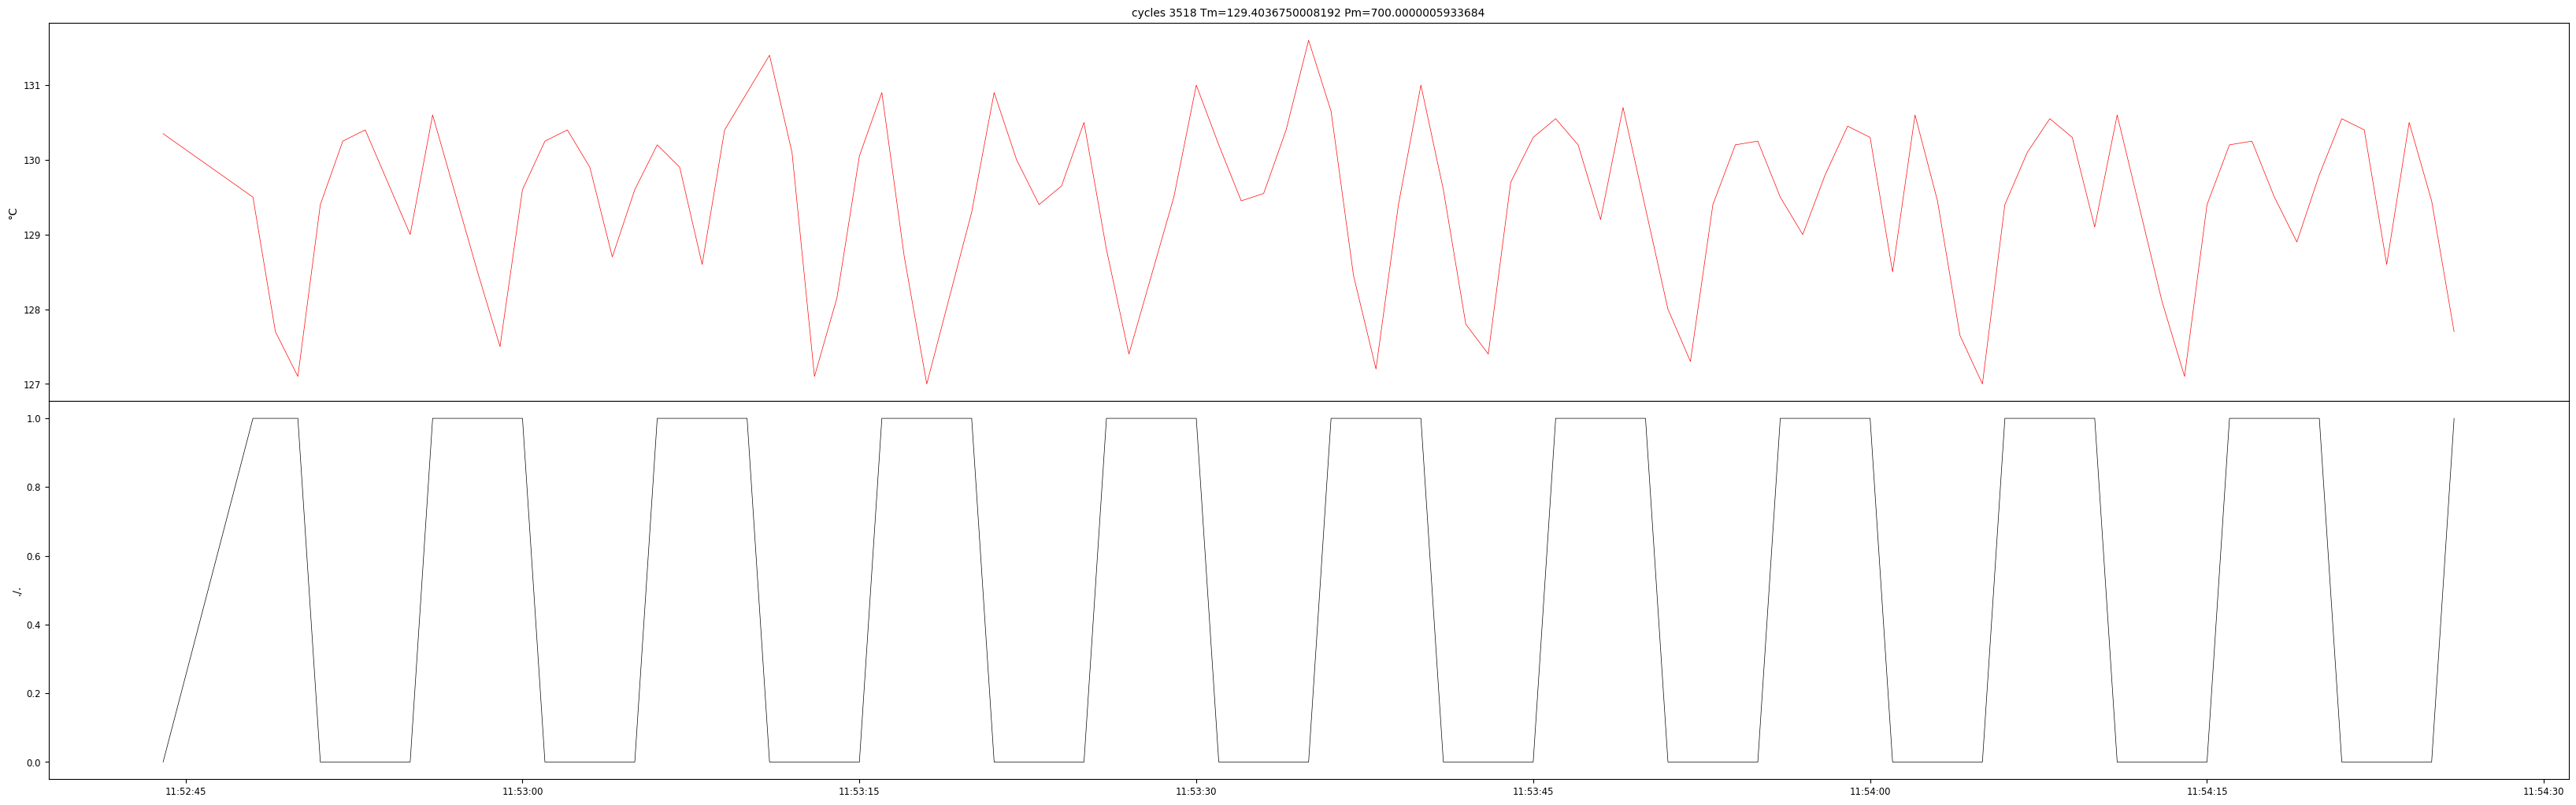

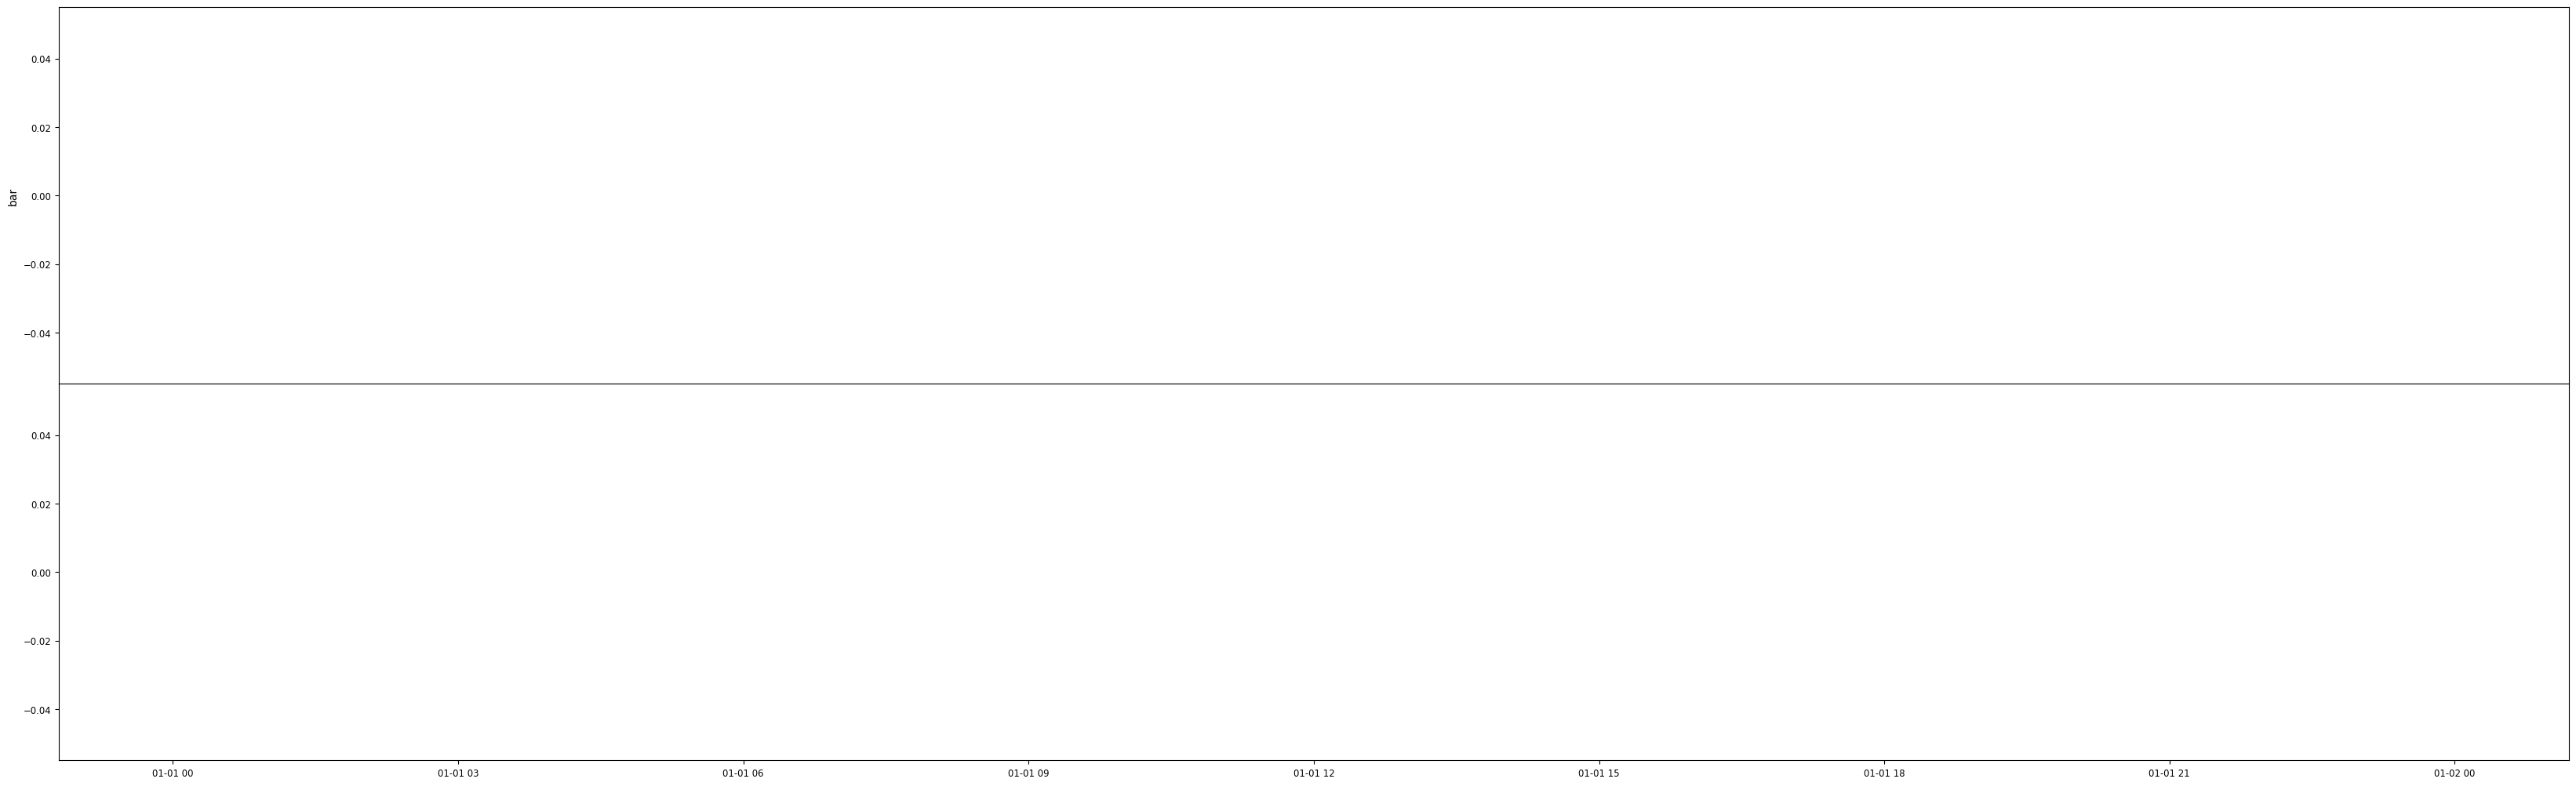

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

style = "seaborn-v0_8-dark-palette"
plt.style.use(style)

mpl.rcParams['backend'] = 'qtagg'
mpl.rcParams['xtick.labelsize'] = 'small'
mpl.rcParams['ytick.labelsize'] = 'small'

fig, ax = plt.subplots(2,1, sharex=True)
fig.set_size_inches(40,12)

dpi = 100
fig.set_dpi(dpi)

lw = .5

i = 100

ax[0].set_title(f"cycles {cycles} Tm={np.nanmean(T)} Pm={np.nanmean(P)}", fontdict={ "size": 10 })

ax[0].plot(t[:i],T[:i], "-", lw=lw, c="red")
ax[0].set_ylabel("°C")

ax[1].plot(t[:i],S[:i], "-", lw=lw, c='black')
ax[1].set_ylabel("./.")

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.0)

plt.show()
plt.close()

# pressure

fig, ax = plt.subplots(2,1, sharex=True)
fig.set_size_inches(40,12)

dpi = 100
fig.set_dpi(dpi)

ax[0].plot(t[:i],P[:i], ".", ms=1, c='blue')
ax[0].set_ylabel("bar")

ax[1].plot(t[:i],R[:i], ".", ms=1, c='red')
ax[1].set_ylabel("")

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.0)

plt.show()
plt.close()